## Importing

The first step of any data analysis in python is importing the necessary libraries.

These will vary depending on your analysis, though from my experience, numpy and pandas seem to always be the life of the party.

Each library has their own importing "best practices." While one could import the module sklearn.linear_models as sklm, for example, we prefer siding with the way it is done in the official documentation, as seen below.

One rule of thumb for importing is considering how many objects from a library will be used in your analysis. If you'll be using several function of class objects throughout your analysis or if you will be experimenting with several objects with similar interfaces, importing the whole module or submodule is a good idea. However, if you will be using few and specific objects, importing said object directly increases the transparency of your code. 

Usig sklearn as an example, I could begin trying out several linear models from sklearn.linear_model aliased as sklm then proceed to select and import one or more of them as I do below. 

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

### Import data and preview the DataFrame

Once youre libraries are imported into the session, we must shift our importing efforts onto the data.

While we will get into data cleaning in a bit, we must always check if the data was imported correctly.

In [2]:
df = pd.read_excel("sample_stocks.xlsx")
df

,Date,SPY,WMT,MSFT,AMZN,HD,NVDA,RL,GPS
0,1999-12-31,1469.250000,69.125000,58.375000,76.125000,68.750000,3.911458,17.062500,46.000000
1,2000-01-03,1455.219971,66.812500,58.281250,89.375000,65.187500,3.901042,17.437500,43.125000
2,2000-01-04,1399.420044,64.312500,56.312500,81.937500,61.750000,3.796875,16.750000,41.562500
3,2000-01-05,1402.109985,63.000000,56.906250,69.750000,63.000000,3.671875,17.062500,39.750000
4,2000-01-06,1403.449951,63.687500,55.000000,65.562500,60.000000,3.432292,17.062500,44.437500
...,...,...,...,...,...,...,...,...,...
5027,2019-12-24,3223.379883,119.510002,157.380005,1789.209961,220.669998,238.619995,118.339996,17.639999
5028,2019-12-26,3239.909912,119.519997,158.669998,1868.770020,220.820007,239.190002,118.400002,17.930000
5029,2019-12-27,3240.020020,119.589996,158.960007,1869.800049,219.970001,236.869995,117.410004,17.830000
5030,2019-12-30,3221.290039,119.400002,157.589996,1846.890015,217.309998,232.320007,116.580002,17.820000


### Check for missing values

In [3]:
# checking for missing values
np.sum(df.isna())

Date    0
SPY     0
WMT     0
MSFT    0
AMZN    0
HD      0
NVDA    0
RL      0
GPS     0
dtype: int64

## DataFrame Handling - Location

Getting a good handle of how to locate the data you want in pandas (or any other library) will be the basis for any analysis, and knowing what is happening behind the scenes will be of great help for finding bugs and improving your program.

### Explore existing indexes of a DataFrame

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.index

RangeIndex(start=0, stop=5032, step=1)

In [6]:
df.columns

Index(['Date', 'SPY', 'WMT', 'MSFT', 'AMZN', 'HD', 'NVDA', 'RL', 'GPS'], dtype='object')

### Set the index to a more useful set of values. Check to see what has changed.

In [7]:
df = df.set_index("Date")

In [8]:
df

,SPY,WMT,MSFT,AMZN,HD,NVDA,RL,GPS
Date,,,,,,,,
1999-12-31,1469.250000,69.125000,58.375000,76.125000,68.750000,3.911458,17.062500,46.000000
2000-01-03,1455.219971,66.812500,58.281250,89.375000,65.187500,3.901042,17.437500,43.125000
2000-01-04,1399.420044,64.312500,56.312500,81.937500,61.750000,3.796875,16.750000,41.562500
2000-01-05,1402.109985,63.000000,56.906250,69.750000,63.000000,3.671875,17.062500,39.750000
2000-01-06,1403.449951,63.687500,55.000000,65.562500,60.000000,3.432292,17.062500,44.437500
...,...,...,...,...,...,...,...,...
2019-12-24,3223.379883,119.510002,157.380005,1789.209961,220.669998,238.619995,118.339996,17.639999
2019-12-26,3239.909912,119.519997,158.669998,1868.770020,220.820007,239.190002,118.400002,17.930000
2019-12-27,3240.020020,119.589996,158.960007,1869.800049,219.970001,236.869995,117.410004,17.830000


In [9]:
df.index

DatetimeIndex(['1999-12-31', '2000-01-03', '2000-01-04', '2000-01-05',
               '2000-01-06', '2000-01-07', '2000-01-10', '2000-01-11',
               '2000-01-12', '2000-01-13',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=5032, freq=None)

In [10]:
df.columns

Index(['SPY', 'WMT', 'MSFT', 'AMZN', 'HD', 'NVDA', 'RL', 'GPS'], dtype='object')

### The three main methods of DataFrame slicing.

In [11]:
# default item selection
df[["MSFT", "AMZN"]]

,MSFT,AMZN
Date,,
1999-12-31,58.375000,76.125000
2000-01-03,58.281250,89.375000
2000-01-04,56.312500,81.937500
2000-01-05,56.906250,69.750000
2000-01-06,55.000000,65.562500
...,...,...
2019-12-24,157.380005,1789.209961
2019-12-26,158.669998,1868.770020
2019-12-27,158.960007,1869.800049


In [12]:
# using the .loc (locator) attribute
type(df.loc)

pandas.core.indexing._LocIndexer

In [13]:
df.loc[:, ["MSFT", "AMZN"]]

,MSFT,AMZN
Date,,
1999-12-31,58.375000,76.125000
2000-01-03,58.281250,89.375000
2000-01-04,56.312500,81.937500
2000-01-05,56.906250,69.750000
2000-01-06,55.000000,65.562500
...,...,...
2019-12-24,157.380005,1789.209961
2019-12-26,158.669998,1868.770020
2019-12-27,158.960007,1869.800049


In [14]:
# using the .iloc (index locator) attribute
type(df.iloc)

pandas.core.indexing._iLocIndexer

In [15]:
df.iloc[:, [2, 3]]

,MSFT,AMZN
Date,,
1999-12-31,58.375000,76.125000
2000-01-03,58.281250,89.375000
2000-01-04,56.312500,81.937500
2000-01-05,56.906250,69.750000
2000-01-06,55.000000,65.562500
...,...,...
2019-12-24,157.380005,1789.209961
2019-12-26,158.669998,1868.770020
2019-12-27,158.960007,1869.800049


### The two core data representations in pandas: DataFrames an Series.

In [16]:
# notice ["AMZN"] is a list
dcbb_df = df.loc["2000-02":"2002-10", ["AMZN"]]

In [17]:
dcbb_df

,AMZN
Date,
2000-02-01,67.437500
2000-02-02,69.437500
2000-02-03,84.187500
2000-02-04,78.562500
2000-02-07,75.000000
...,...
2002-10-25,19.299999
2002-10-28,18.590000
2002-10-29,18.570000


In [18]:
type(dcbb_df)

pandas.core.frame.DataFrame

In [19]:
# notice this time "AMZN" is a string
dcbb_s = df.loc["2000-02":"2002-10", "AMZN"]

In [20]:
dcbb_s

Date
2000-02-01    67.437500
2000-02-02    69.437500
2000-02-03    84.187500
2000-02-04    78.562500
2000-02-07    75.000000
                ...    
2002-10-25    19.299999
2002-10-28    18.590000
2002-10-29    18.570000
2002-10-30    19.080000
2002-10-31    19.360001
Name: AMZN, Length: 691, dtype: float64

In [21]:
type(dcbb_s)

pandas.core.series.Series

In [22]:
dcbb_s.index

DatetimeIndex(['2000-02-01', '2000-02-02', '2000-02-03', '2000-02-04',
               '2000-02-07', '2000-02-08', '2000-02-09', '2000-02-10',
               '2000-02-11', '2000-02-14',
               ...
               '2002-10-18', '2002-10-21', '2002-10-22', '2002-10-23',
               '2002-10-24', '2002-10-25', '2002-10-28', '2002-10-29',
               '2002-10-30', '2002-10-31'],
              dtype='datetime64[ns]', name='Date', length=691, freq=None)

In [24]:
# This is meant to throw an error, as a pandas.Series object does not have columns
dcbb_s.columns 

AttributeError: 'Series' object has no attribute 'columns'

## Data Exploration

Now that we have our dataframe clean and ready to be explored, let's learn how to _actually_ explore it!

This will often be where the brunt of the work when analysing a new dataset (assuming there's not much cleaning needed, which is often not the case). Models and graphs are great, and often what we are exposed to as the consumers of data, however, your job as an analyst is to explore all the posibilities the data has to offer _before_ presenting it. Data consumers have a very limited appetite for content, so make sure you understand the data well enough to select its most important parts.

### Data composition exploration

In [25]:
df.dtypes

SPY     float64
WMT     float64
MSFT    float64
AMZN    float64
HD      float64
NVDA    float64
RL      float64
GPS     float64
dtype: object

In [26]:
np.sum(df.isna())

SPY     0
WMT     0
MSFT    0
AMZN    0
HD      0
NVDA    0
RL      0
GPS     0
dtype: int64

In [27]:
df.shape

(5032, 8)

### Statistical exploration

In [28]:
df.describe()

,SPY,WMT,MSFT,AMZN,HD,NVDA,RL,GPS
count,5032.000000,5032.000000,5032.000000,5032.000000,5032.000000,5032.000000,5032.000000,5032.000000
mean,1574.988273,63.363546,42.270003,360.974796,72.321382,41.869758,84.493553,24.272207
std,585.882351,16.869367,28.034262,517.826559,55.597210,64.214970,49.182515,8.615044
min,676.530029,42.270000,15.150000,5.970000,18.000000,2.456667,13.250000,8.840000
25%,1151.724945,51.177499,26.528751,40.454999,34.617499,10.550000,37.450001,18.150000
50%,1361.224976,56.435000,29.730000,120.070000,43.004999,15.260000,80.560001,21.670000
75%,1986.464966,73.765001,46.042501,375.140015,103.507500,24.542500,124.427504,28.827500
max,3240.020020,121.279999,158.960007,2039.510010,238.850006,289.359985,189.559998,52.875000


In [29]:
df.mean()

SPY     1574.988273
WMT       63.363546
MSFT      42.270003
AMZN     360.974796
HD        72.321382
NVDA      41.869758
RL        84.493553
GPS       24.272207
dtype: float64

In [30]:
df.var()

SPY     343258.129122
WMT        284.575547
MSFT       785.919845
AMZN    268144.345134
HD        3091.049814
NVDA      4123.562404
RL        2418.919745
GPS         74.218983
dtype: float64

In [31]:
df.std()

SPY     585.882351
WMT      16.869367
MSFT     28.034262
AMZN    517.826559
HD       55.597210
NVDA     64.214970
RL       49.182515
GPS       8.615044
dtype: float64

In [32]:
df.cov()

,SPY,WMT,MSFT,AMZN,HD,NVDA,RL,GPS
SPY,343258.129122,8707.950620,15021.573559,280463.545694,31629.205883,32079.026172,14358.753105,2062.988303
WMT,8707.950620,284.575547,412.964941,7645.963256,842.781861,824.349860,455.053959,62.722359
MSFT,15021.573559,412.964941,785.919845,14017.733413,1466.762132,1621.990993,389.099321,43.403267
AMZN,280463.545694,7645.963256,14017.733413,268144.345134,27472.319999,30970.076414,9983.460352,830.901980
HD,31629.205883,842.781861,1466.762132,27472.319999,3091.049814,3128.300611,1115.164327,158.548526
NVDA,32079.026172,824.349860,1621.990993,30970.076414,3128.300611,4123.562404,768.312453,53.738684
RL,14358.753105,455.053959,389.099321,9983.460352,1115.164327,768.312453,2418.919745,240.353130
GPS,2062.988303,62.722359,43.403267,830.901980,158.548526,53.738684,240.353130,74.218983


In [33]:
df.corr()

,SPY,WMT,MSFT,AMZN,HD,NVDA,RL,GPS
SPY,1.000000,0.881063,0.914568,0.924446,0.971013,0.852657,0.498305,0.408723
WMT,0.881063,1.000000,0.873223,0.875284,0.898594,0.760986,0.548471,0.431585
MSFT,0.914568,0.873223,1.000000,0.965616,0.941061,0.900996,0.282202,0.179711
AMZN,0.924446,0.875284,0.965616,1.000000,0.954241,0.931369,0.392000,0.186255
HD,0.971013,0.898594,0.941061,0.954241,1.000000,0.876232,0.407826,0.331018
NVDA,0.852657,0.760986,0.900996,0.931369,0.876232,1.000000,0.243271,0.097139
RL,0.498305,0.548471,0.282202,0.392000,0.407826,0.243271,1.000000,0.567259
GPS,0.408723,0.431585,0.179711,0.186255,0.331018,0.097139,0.567259,1.000000


In [34]:
df.quantile(0.95)

SPY     2817.226074
WMT       98.750000
MSFT     109.904000
AMZN    1749.826977
HD       196.228500
NVDA     209.610001
RL       171.462503
GPS       41.555624
Name: 0.95, dtype: float64

### Graphical exploration

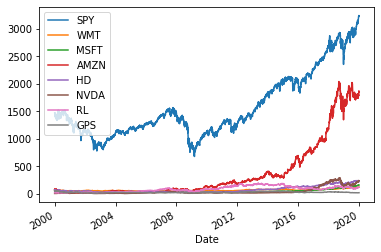

In [35]:
df.plot()

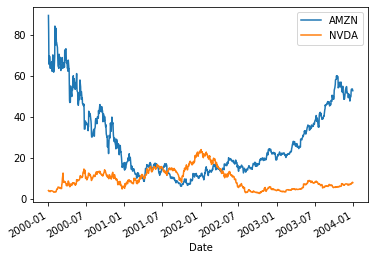

In [36]:
tickers = ["AMZN", "NVDA"]
start = "2000"
end = "2003"

df.loc[start:end, tickers].plot()

In [37]:
# we recreate the above procedure as a function
def plot_ticks(df, tickers, start=None, end=None):
    return df.loc[start:end, tickers].plot()

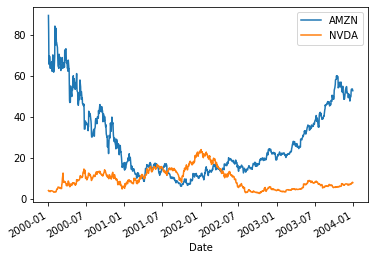

In [38]:
plot_ticks(df, ["AMZN", "NVDA"], "2000", "2003")

## Data Manipulation

You've seen the data as it is "by default", and might have some questions at the back of your head; maybe even answers already! 

Data manipulation is both a means and an end, as it can be used to present your findings or dig deeper into exploration. Either way, you'll notice that this will tend to involve just a few core concepts.

Below we'll introduce the .apply() method, which is widely used to manipulate data in Pandas. We'll learn more about how it works internaly, then see how it can be used to "pipe" manipulation steps together. Several other methods in Pandas have a similar interface, so knowing how .apply() works opens the doors to a lot more of what Pandas has to offer!

### The .apply() method

In [39]:
df.apply(lambda x: print(x), axis=0)

Date
1999-12-31    1469.250000
2000-01-03    1455.219971
2000-01-04    1399.420044
2000-01-05    1402.109985
2000-01-06    1403.449951
                 ...     
2019-12-24    3223.379883
2019-12-26    3239.909912
2019-12-27    3240.020020
2019-12-30    3221.290039
2019-12-31    3230.780029
Name: SPY, Length: 5032, dtype: float64
Date
1999-12-31     69.125000
2000-01-03     66.812500
2000-01-04     64.312500
2000-01-05     63.000000
2000-01-06     63.687500
                 ...    
2019-12-24    119.510002
2019-12-26    119.519997
2019-12-27    119.589996
2019-12-30    119.400002
2019-12-31    118.839996
Name: WMT, Length: 5032, dtype: float64
Date
1999-12-31     58.375000
2000-01-03     58.281250
2000-01-04     56.312500
2000-01-05     56.906250
2000-01-06     55.000000
                 ...    
2019-12-24    157.380005
2019-12-26    158.669998
2019-12-27    158.960007
2019-12-30    157.589996
2019-12-31    157.699997
Name: MSFT, Length: 5032, dtype: float64
Date
1999-12-31      76.1250

SPY     None
WMT     None
MSFT    None
AMZN    None
HD      None
NVDA    None
RL      None
GPS     None
dtype: object

In [40]:
def index_prices(col, at=1):
    return (col / col.iloc[0]) * at

df.apply(index_prices, at=100, axis=0)

,SPY,WMT,MSFT,AMZN,HD,NVDA,RL,GPS
Date,,,,,,,,
1999-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2000-01-03,99.045089,96.654611,99.839400,117.405583,94.818182,99.733705,102.197802,93.750000
2000-01-04,95.247238,93.037975,96.466809,107.635468,89.818182,97.070581,98.168498,90.353261
2000-01-05,95.430321,91.139241,97.483940,91.625616,91.636364,93.874842,100.000000,86.413043
2000-01-06,95.521521,92.133816,94.218415,86.124795,87.272727,87.749683,100.000000,96.603261
...,...,...,...,...,...,...,...,...
2019-12-24,219.389476,172.889695,269.601722,2350.357913,320.974543,6100.538341,693.567742,38.347824
2019-12-26,220.514542,172.904155,271.811560,2454.870305,321.192737,6115.111092,693.919426,38.978261
2019-12-27,220.522036,173.005419,272.308363,2456.223381,319.956365,6055.797991,688.117240,38.760870


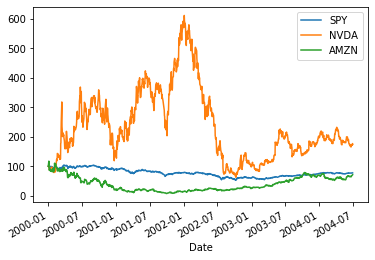

In [41]:
def plot_indexed_prices(df, ticker, start=None, end=None, at=100):
    return plot_ticks(
        df.apply(index_prices, at=at, axis=0),
        ticker,
        start=start,
        end=end,
    )

plot_indexed_prices(df, ["SPY", "NVDA", "AMZN"], start=None, end="2004-06")

### Method pipelining

In [42]:
df.apply(lambda col: np.log(col)).apply(index_prices, at=100, axis=0)

,SPY,WMT,MSFT,AMZN,HD,NVDA,RL,GPS
Date,,,,,,,,
1999-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2000-01-03,99.868427,99.196720,99.960479,103.703839,98.742246,99.804496,100.766334,98.314323
2000-01-04,99.332271,98.296415,99.115511,101.698376,97.461687,97.820103,99.348411,97.350416
2000-01-05,99.358604,97.809642,99.373414,97.981263,97.935410,95.365695,100.000000,96.185813
2000-01-06,99.371703,98.065870,98.535624,96.552173,96.782108,90.418582,100.000000,99.097390
...,...,...,...,...,...,...,...,...
2019-12-24,110.773776,112.924797,124.386599,172.873458,127.566435,401.410029,168.267838,74.965731
2019-12-26,110.843917,112.926771,124.587324,173.877671,127.582499,401.584961,168.285707,75.391633
2019-12-27,110.844383,112.940594,124.632225,173.890390,127.491333,400.870341,167.989727,75.245554


### Aggregation by period

We've seen how the .apply() behaves as a method of a pandas.DataFrame. 

Now we'll introduce other Pandas objects. These are **not** pandas.DataFrame instances, but as we'll see, their own .apply() method acts the same way and can be used to create an altered dataframe.

We'll also introduce variants of the .apply() method implemented by the Pandas developpers to increase the efficiency and clarity of your code in some common applications.

In [80]:
type(df.resample("Y"))

pandas.core.resample.DatetimeIndexResampler

In [44]:
df.resample("Y").apply(lambda x: print(x))

1999-12-31    1469.25
Name: SPY, dtype: float64
2000-01-03    1455.219971
2000-01-04    1399.420044
2000-01-05    1402.109985
2000-01-06    1403.449951
2000-01-07    1441.469971
                 ...     
2000-12-22    1305.949951
2000-12-26    1315.189941
2000-12-27    1328.920044
2000-12-28    1334.219971
2000-12-29    1320.280029
Name: SPY, Length: 252, dtype: float64
2001-01-02    1283.270020
2001-01-03    1347.560059
2001-01-04    1333.339966
2001-01-05    1298.349976
2001-01-08    1295.859985
                 ...     
2001-12-24    1144.650024
2001-12-26    1149.369995
2001-12-27    1157.130005
2001-12-28    1161.020020
2001-12-31    1148.079956
Name: SPY, Length: 248, dtype: float64
2002-01-02    1154.670044
2002-01-03    1165.270020
2002-01-04    1172.510010
2002-01-07    1164.890015
2002-01-08    1160.709961
                 ...     
2002-12-24     892.469971
2002-12-26     889.659973
2002-12-27     875.400024
2002-12-30     879.390015
2002-12-31     879.820007
Name: SPY, Lengt

,SPY,WMT,MSFT,AMZN,HD,NVDA,RL,GPS
Date,,,,,,,,
1999-12-31,None,None,None,None,None,None,None,None
2000-12-31,None,None,None,None,None,None,None,None
2001-12-31,None,None,None,None,None,None,None,None
2002-12-31,None,None,None,None,None,None,None,None
2003-12-31,None,None,None,None,None,None,None,None
2004-12-31,None,None,None,None,None,None,None,None
2005-12-31,None,None,None,None,None,None,None,None
2006-12-31,None,None,None,None,None,None,None,None
2007-12-31,None,None,None,None,None,None,None,None


In [81]:
# the .mean() method acts the same as .apply(np.mean)
df.resample("Y").mean()

,SPY,WMT,MSFT,AMZN,HD,NVDA,RL,GPS
Date,,,,,,,,
1999-12-31,1469.250000,69.125000,58.375000,76.125000,68.750000,3.911458,17.062500,46.000000
2000-12-31,1427.221069,53.713852,38.110243,46.533668,52.279514,8.778827,17.632192,33.892423
2001-12-31,1194.178994,51.992661,31.271087,12.200426,45.679627,13.181552,25.341431,23.133599
2002-12-31,993.934804,55.367301,27.274524,16.484127,37.641230,9.614749,24.336905,13.558135
2003-12-31,965.227540,54.303770,26.101429,37.741389,30.209008,5.900344,25.477024,17.713254
2004-12-31,1130.649445,54.909048,27.124762,43.565238,37.203214,6.465913,34.878214,21.369167
2005-12-31,1207.229443,48.737698,25.871270,39.897103,40.103770,9.513823,45.214167,19.904722
2006-12-31,1310.461236,46.630717,26.290359,35.909323,38.260717,18.095963,61.795936,18.188884
2007-12-31,1477.184342,46.926494,30.446773,67.229482,36.096175,27.724542,83.012032,18.779522


## pandas vs numpy

In the beginning of the notebook I mentioned numpy and pandas where the life of the party, but in the end, are they all that different? 

Pandas is actually based off of numpy, so it's like a great remix of a great song. As we'll see below, these two have several common characteristics, and several differences.

In [46]:
isinstance(df, np.ndarray)

False

In [47]:
isinstance(df.values, np.ndarray)

True

In [48]:
df.values

array([[1469.25    ,   69.125   ,   58.375   , ...,    3.911458,
          17.0625  ,   46.      ],
       [1455.219971,   66.8125  ,   58.28125 , ...,    3.901042,
          17.4375  ,   43.125   ],
       [1399.420044,   64.3125  ,   56.3125  , ...,    3.796875,
          16.75    ,   41.5625  ],
       ...,
       [3240.02002 ,  119.589996,  158.960007, ...,  236.869995,
         117.410004,   17.83    ],
       [3221.290039,  119.400002,  157.589996, ...,  232.320007,
         116.580002,   17.82    ],
       [3230.780029,  118.839996,  157.699997, ...,  235.300003,
         117.220001,   17.68    ]])

In [49]:
df.shape

(5032, 8)

In [50]:
# transpose dataframe
df.T

Date,1999-12-31,2000-01-03,2000-01-04,2000-01-05,2000-01-06,2000-01-07,2000-01-10,2000-01-11,2000-01-12,2000-01-13,...,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31
SPY,1469.250000,1455.219971,1399.420044,1402.109985,1403.449951,1441.469971,1457.599976,1438.560059,1432.250000,1449.680054,...,3192.520020,3191.139893,3205.370117,3221.219971,3224.010010,3223.379883,3239.909912,3240.020020,3221.290039,3230.780029
WMT,69.125000,66.812500,64.312500,63.000000,63.687500,68.500000,67.250000,66.250000,65.062500,65.125000,...,121.279999,119.860001,120.080002,120.290001,119.029999,119.510002,119.519997,119.589996,119.400002,118.839996
MSFT,58.375000,58.281250,56.312500,56.906250,55.000000,55.718750,56.125000,54.687500,52.906250,53.906250,...,154.690002,154.369995,155.710007,157.410004,157.410004,157.380005,158.669998,158.960007,157.589996,157.699997
AMZN,76.125000,89.375000,81.937500,69.750000,65.562500,69.562500,69.187500,66.750000,63.562500,65.937500,...,1790.660034,1784.030029,1792.280029,1786.500000,1793.000000,1789.209961,1868.770020,1869.800049,1846.890015,1847.839966
HD,68.750000,65.187500,61.750000,63.000000,60.000000,63.500000,63.187500,61.562500,61.062500,62.125000,...,217.720001,218.000000,220.220001,221.190002,219.210007,220.669998,220.820007,219.970001,217.309998,218.380005
NVDA,3.911458,3.901042,3.796875,3.671875,3.432292,3.489583,3.604167,3.458333,3.369792,3.510417,...,228.289993,229.509995,235.460007,239.369995,238.820007,238.619995,239.190002,236.869995,232.320007,235.300003
RL,17.062500,17.437500,16.750000,17.062500,17.062500,17.500000,18.250000,17.625000,16.750000,16.437500,...,117.459999,118.980003,117.529999,118.430000,117.790001,118.339996,118.400002,117.410004,116.580002,117.220001
GPS,46.000000,43.125000,41.562500,39.750000,44.437500,46.562500,47.750000,49.437500,49.937500,49.187500,...,17.320000,17.730000,17.799999,17.590000,17.660000,17.639999,17.930000,17.830000,17.820000,17.680000


In [52]:
df.reshape # This is meant to throw an error

AttributeError: 'DataFrame' object has no attribute 'reshape'

## Simple Linear Regression

Now that we have something the model deems pallateable (which is a great feat), let's feed it and see what it says!

The scikit-learn workflow is used beyond the core library, and serves as inspiration for countless other libraries out there which implement totally different models, but using the basic workflow you'll see below.

### Linear regression with scikit-learn

In [ ]:
lm = LinearRegression()

X = df.loc[:, "SPY"].values.reshape(-1, 1)
y = df.loc[:, "AMZN"].values

lm.fit(X, y)

In [ ]:
lm.intercept_

In [ ]:
lm.coef_

In [ ]:
lm.score(X, y)

In [ ]:
lm = LinearRegression()

X = np.arange(df.shape[0]).reshape(-1, 1)
y = df.values

lm.fit(X, y)

In [53]:
lm.intercept_

NameError: name 'lm' is not defined

In [54]:
lm.coef_

NameError: name 'lm' is not defined

In [55]:
lm.score(X, y)

NameError: name 'lm' is not defined

## Plotting with Seaborn

The de-facto leader for python plotting is with no doubt matplotlib. It's an incredible library that brings plotting to python in an extrememly intuitive and pythonic way. The problem is: most people don't speak or intuit in Python. 

Plots can be a tricky subject to model, and it takes a good ammount of time and practice to get acquainted to the matplotlib way of doing stuff. Plus, the tradgedy of all these libraries that two extremely popular libraries might not fully support each other! 

The plots we have shown up to now have been made in matplotlib, but if we want to plot anything more complex, then, my friend, its a long way down the rabit hole from there.

Luckily, seaborn builds on matplotlib to create aethetic graphs that more intutively integrate pandas dataframes. Keep in mind that it does so by constraining certain options and so you will not have as much freedom as you would in using matplotlib from scratch, but for now, we want to stay away from the rabbit hole.

In [56]:
sns.set(style="darkgrid")
rets = df.pct_change()

In [57]:
rets

,SPY,WMT,MSFT,AMZN,HD,NVDA,RL,GPS
Date,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,-0.009549,-0.033454,-0.001606,0.174056,-0.051818,-0.002663,0.021978,-0.062500
2000-01-04,-0.038345,-0.037418,-0.033780,-0.083217,-0.052733,-0.026702,-0.039427,-0.036232
2000-01-05,0.001922,-0.020408,0.010544,-0.148741,0.020243,-0.032922,0.018657,-0.043609
2000-01-06,0.000956,0.010913,-0.033498,-0.060036,-0.047619,-0.065248,0.000000,0.117925
...,...,...,...,...,...,...,...,...
2019-12-24,-0.000195,0.004033,-0.000191,-0.002114,0.006660,-0.000838,0.004669,-0.001133
2019-12-26,0.005128,0.000084,0.008197,0.044467,0.000680,0.002389,0.000507,0.016440
2019-12-27,0.000034,0.000586,0.001828,0.000551,-0.003849,-0.009699,-0.008361,-0.005577


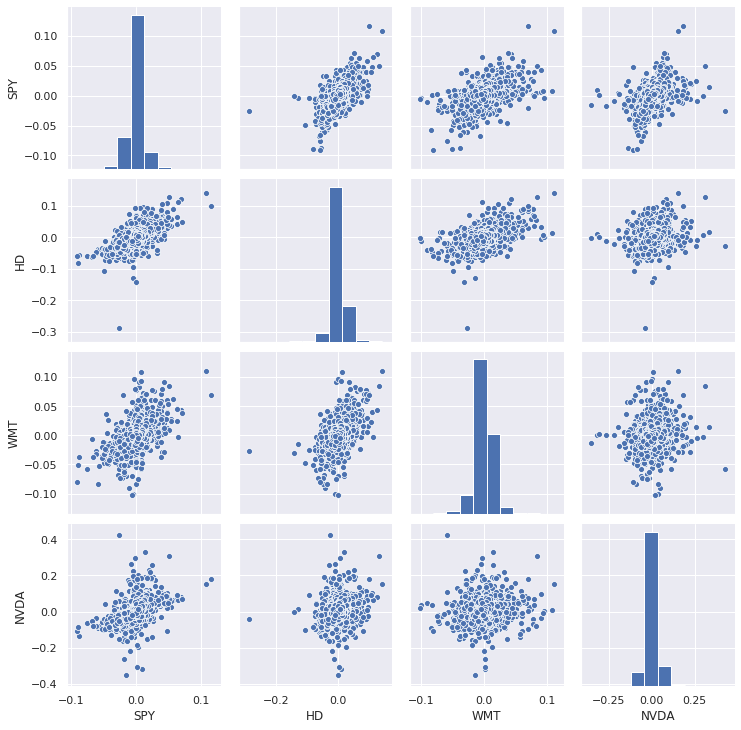

In [58]:
sns.pairplot(vars=["SPY", "HD", "WMT", "NVDA"], data=rets)

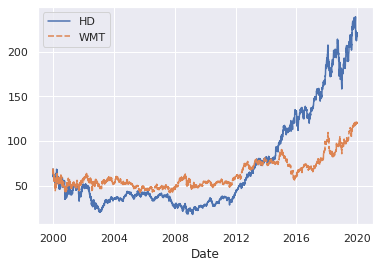

In [59]:
sns.lineplot(data=df.loc[:, ["HD", "WMT"]])

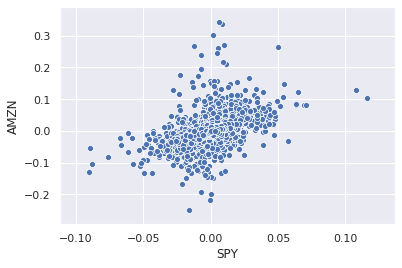

In [60]:
sns.scatterplot(x="SPY", y="AMZN", data=rets)

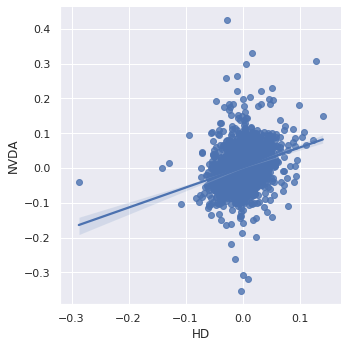

In [61]:
sns.lmplot(x="HD", y="NVDA", data=rets)

## Extra: Matplotlib Objects and Saving Figures

If you do want to take a peak insidie that rabbit hole I talked about earlier, here we go.

Matplotlib has an object-centered workflow for graphs, and below we see the creation of its two main citizens: the figure and the axis. As I also mentioned earlier, seaborn extends matplotlib, so it can take an axis to plot on it instead of returning a new one as it does by default.

Going into more details would quicly get out of hand, so just understand that matplotlib is a geniously-crafted library, but that dealing with it can feel like learning a whole new language. 

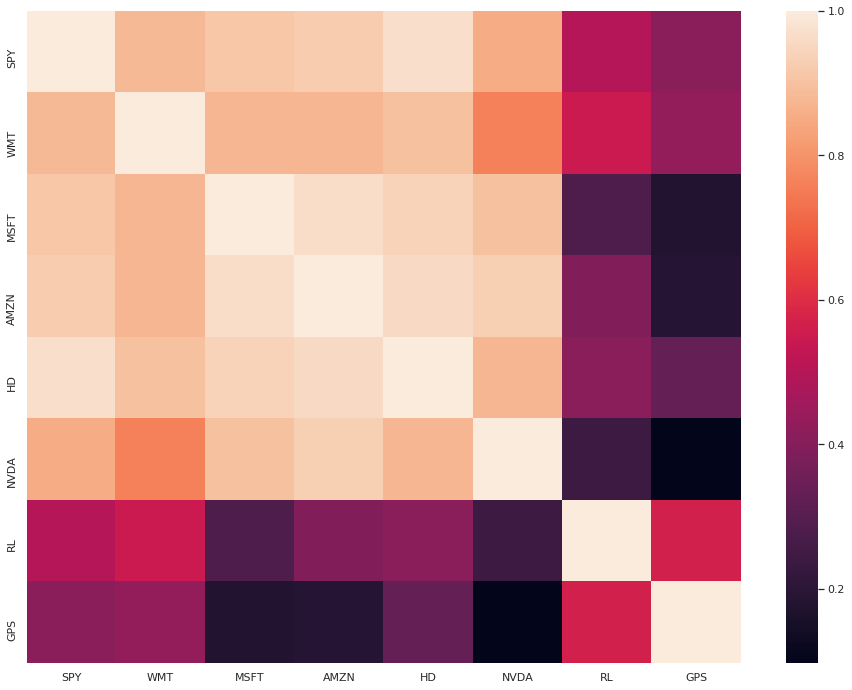

In [78]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

sns.heatmap(df.corr(), ax=ax)

In [79]:
fig.savefig("corr_matrix.png")